# 1. Error Function

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import math
from scipy.misc import derivative

$$ erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt. $$
- 위와 같이 주어지는 에러함수를 수치적분을 이용하여 구하고 그래프를 그려라. (어떤 방법을 이용하든 관계없음)
$$
\begin{align}
erf(x) & = \frac{2}{\pi} \sum_{n=0}^{\infty} \frac{ (-1)^n x^{2n+1}} { (2n+1) n!}  & (1)  \\ 
& = \frac{2}{\pi} \left( x - \frac{x^3}{3} + \frac{x^5}{10} - \frac{x^7}{42} + \cdots \right) & (2)
\end{align}
$$
- 에러함수를 테일러 전개하면 위와 같이 주어진다. 위의 전개식과 적분결과를 그래프로 그리고 비교하여라.

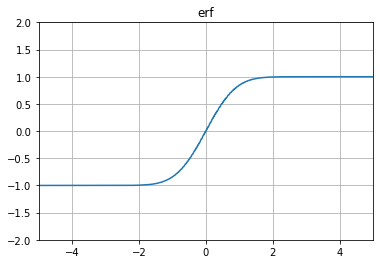

In [36]:
def erf(x):
    return 2*(np.pi**-0.5)*(np.exp(-x**2))

def integ_erf(erf,a,b,n):
    s, x, dx = -1, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*erf(x)+0.5*erf(x+dx))
        x = x+dx
    return s

x = np.arange(-5,5,0.01)
plt.axis([-5,5,-2,2])
plt.plot(x,[integ_erf(erf,-5,k,500) for k in x])
plt.title('erf')
plt.grid()
plt.show()

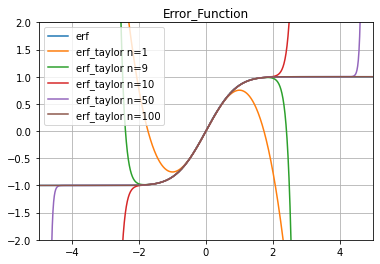

In [47]:
def erf_taylor(x, n):
    f=0
    for i in range(n+1):
        f = f+(2*np.pi**(-0.5))*(((-1)**i)*(x**(2*i+1)))/((2*i+1)*math.factorial(i))
        i = i+1
    return f

plt.plot(x,[integ_erf(erf,-5,k,500) for k in x], label='erf')
plt.plot(x, erf_taylor(x, 1), label='erf_taylor n=1')
plt.plot(x, erf_taylor(x, 9), label='erf_taylor n=9')
plt.plot(x, erf_taylor(x, 10), label='erf_taylor n=10')
plt.plot(x, erf_taylor(x, 50), label='erf_taylor n=50')
plt.plot(x, erf_taylor(x, 100), label='erf_taylor n=100')
plt.grid()
plt.legend()
plt.title('Error_Function')
plt.axis([-5,5,-2,2])
plt.show()

### n이 9까지는 기존의 erf값과의 대칭인 그래프의 모양이 나타나고, n이 10부터는 erf의 값과 같은 모양의 그래프가 나온다. 여기서 n의 값이 클수록 erf의 모양과 비슷해지는 그래프를 볼 수 있다.

# 2. (Integration) Trigonometric Function

- sin, cos함수를 trapezoidal 방법을 이용하여 직접 적분하고 그래프를 그려라.
- sin, cos함수를 scipy.integrate 함수를 이용하여 적분하고 그래프를 그려라.


구체적으로 $\int_0^x sin(t) dt$, $\int_0^x cos(t) dt$를 x에 대해서 그려라.

In [73]:
xdata = np.arange(-5,5,0.01)
def sin(t):
    return np.sin(t)

def cos(t):
    return np.cos(t)

## trapezoidal(sin, cos)

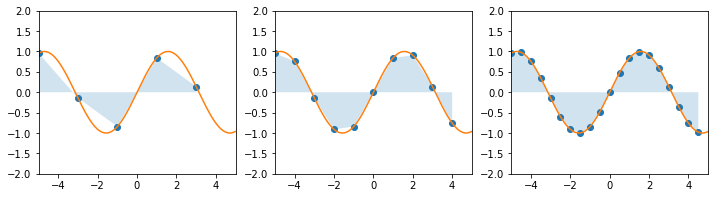

In [56]:
x1 = np.arange(-5,5,2)
x2 = np.arange(-5,5,1)
x3 = np.arange(-5,5,0.5)

plt.figure(figsize=(12,3));
plt.subplot(1,3,1)
plt.xlim(-5,5);plt.ylim(-2,2)
plt.plot(x1,sin(x1),'o');
plt.plot(xdata,sin(xdata));
plt.fill_between(x1,sin(x1),alpha=0.2)

plt.subplot(1,3,2)
plt.xlim(-5,5);plt.ylim(-2,2)
plt.plot(x2,sin(x2),'o');
plt.plot(xdata,sin(xdata));
plt.fill_between(x2,sin(x2),alpha=0.2)

plt.subplot(1,3,3)
plt.xlim(-5,5);plt.ylim(-2,2)
plt.plot(x3,sin(x3),'o');
plt.plot(xdata,sin(xdata));
plt.fill_between(x3,sin(x3),alpha=0.2)

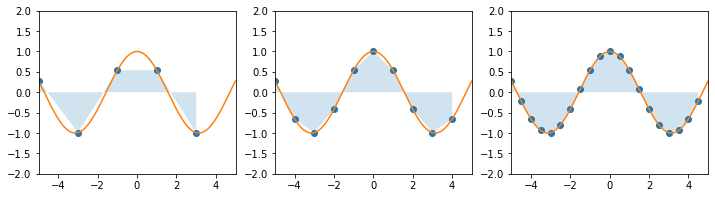

In [71]:
x1 = np.arange(-5,5,2)
x2 = np.arange(-5,5,1)
x3 = np.arange(-5,5,0.5)

plt.figure(figsize=(12,3));
plt.subplot(1,3,1)
plt.xlim(-5,5);plt.ylim(-2,2)
plt.plot(x1,cos(x1),'o');
plt.plot(xdata,cos(xdata));
plt.fill_between(x1,cos(x1),alpha=0.2)

plt.subplot(1,3,2)
plt.xlim(-5,5);plt.ylim(-2,2)
plt.plot(x2,cos(x2),'o');
plt.plot(xdata,cos(xdata));
plt.fill_between(x2,cos(x2),alpha=0.2)

plt.subplot(1,3,3)
plt.xlim(-5,5);plt.ylim(-2,2)
plt.plot(x3,cos(x3),'o');
plt.plot(xdata,cos(xdata));
plt.fill_between(x3,cos(x3),alpha=0.2)

## scipy.integrate(sin, cos)

In [104]:
from scipy import integrate

xdata = np.arange(-5,5,0.01)
def sin(t):
    return np.sin(t)

def cos(t):
    return np.cos(t)

def integrate(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

In [110]:
print(integrate.quad(sin, 0, 6))
print(integrate.quad(cos, 0, 6))

(0.03982971334963404, 4.407690371583285e-14)
(-0.27941549819892586, 4.1227842569469204e-14)


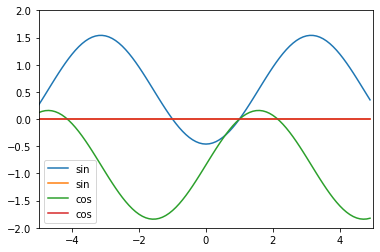

In [109]:
from scipy import integrate

x = np.arange(-5,5,0.1)
plt.ylim(-2,2)
plt.axis([-5,5,-2,2])
plt.plot(x,[integrate.quad(sin,1,b) for b in x], label='sin')
plt.plot(x,[integrate.quad(cos,1,b) for b in x], label='cos')
plt.legend()
plt.show()

# 3. (Differentiation) Trigonometric Function

- sin, cos함수의 도함수를 finite difference 방법을 이용하여 구현하고 그래프를 그려라.
- sin, cos함수의 도함수를 scipy.misc.derivative 함수를 이용하여 구하고 그래프를 그려라.


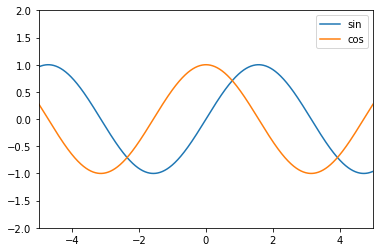

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

xdata = np.arange(-5,5,0.01)
def sin(x):
    return np.sin(x)

def cos(x):
    return np.cos(x)

plt.xlim(-5,5);plt.ylim(-2,2)
plt.plot(xdata,sin(xdata), label='sin');

plt.xlim(-5,5);plt.ylim(-2,2)
plt.plot(xdata,cos(xdata), label='cos');

plt.legend()
plt.show()

## finite difference(sin, cos)

In [160]:
def integrate(f,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*f(x)+0.5*f(x+dx))
        x = x + dx
    return s

def for_diff(f,x,dx):
    return (f(x+dx)-f(x))/dx
def back_diff(f,x,dx):
    return (f(x)-f(x-dx))/dx
def cen_diff(f,x,dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

In [161]:
dx=0.1
xdata=np.arange(-5,5,0.1)
diff1=[for_diff(sin,i,dx) for i in xdata]
diff2=[back_diff(sin,i,dx) for i in xdata]
diff3=[cen_diff(sin,i,dx) for i in xdata]

In [162]:
dx=0.1
xdata=np.arange(-5,5,0.1)
diff4=[for_diff(cos,i,dx) for i in xdata]
diff5=[back_diff(cos,i,dx) for i in xdata]
diff6=[cen_diff(cos,i,dx) for i in xdata]

Text(0.5, 1.0, 'sin')

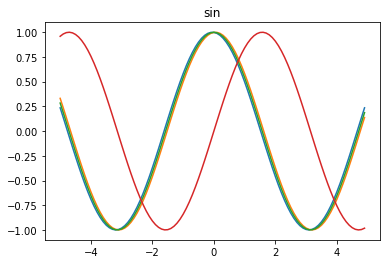

In [166]:
plt.plot(x,diff1)
plt.plot(x,diff2)
plt.plot(x,diff3)
plt.plot(x,sin(x))
plt.title('sin')

Text(0.5, 1.0, 'cos')

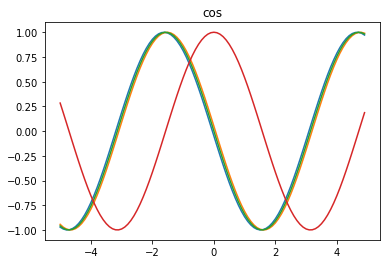

In [167]:
plt.plot(x,diff4)
plt.plot(x,diff5)
plt.plot(x,diff6)
plt.plot(x,cos(x))
plt.title('cos')

## scipy.misc.derivative

In [172]:
from scipy.misc import derivative
derivative(np.sin,np.pi,dx=0.00001, n=2)

0.0

In [173]:
from scipy.misc import derivative
derivative(np.cos,np.pi,dx=0.00001, n=2)

1.0000000827403708

Text(0.5, 1.0, 'sin')

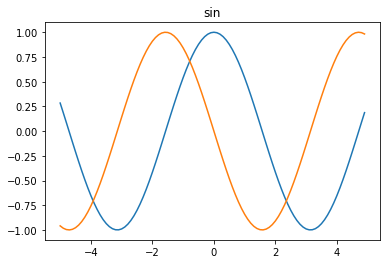

In [175]:
plt.plot(xdata,[derivative(np.sin,i,dx=0.00001) for i in xdata])
plt.plot(xdata,[derivative(np.sin,i,dx=0.00001,n=2) for i in xdata])
plt.title('sin')

Text(0.5, 1.0, 'cos')

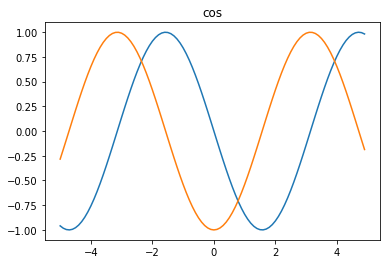

In [176]:
plt.plot(xdata,[derivative(np.cos,i,dx=0.00001) for i in xdata])
plt.plot(xdata,[derivative(np.cos,i,dx=0.00001,n=2) for i in xdata])
plt.title('cos')